# Instructor Do: Decision Trees

In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("../Resources/credit_data.csv")
df = pd.read_csv(file_path)

In [3]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

# Set Index
X = X.set_index('id')

In [4]:
# Print first five entries for target
y[:5]



0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [5]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

X.head()

,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,...,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes
id,,,,,,,,,,,,,,,,,,,,,
1,18,1049,21,False,False,False,True,True,False,False,...,False,True,False,False,True,False,True,False,True,False
2,9,2799,36,False,False,False,True,True,False,False,...,False,True,False,False,False,True,True,False,True,False
3,12,841,23,True,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
4,12,2122,39,False,False,False,True,True,False,False,...,False,False,False,True,False,True,True,False,False,True
5,12,2171,38,False,False,False,True,True,False,False,...,False,False,False,True,True,False,True,False,False,True


In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [8]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)



In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [10]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()



In [11]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [12]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



## Model Evaluation

In [13]:
# Displaying classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         bad       0.48      0.49      0.48        74
        good       0.78      0.78      0.78       176

    accuracy                           0.69       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.69      0.69      0.69       250



## Visualizing the Decision Tree

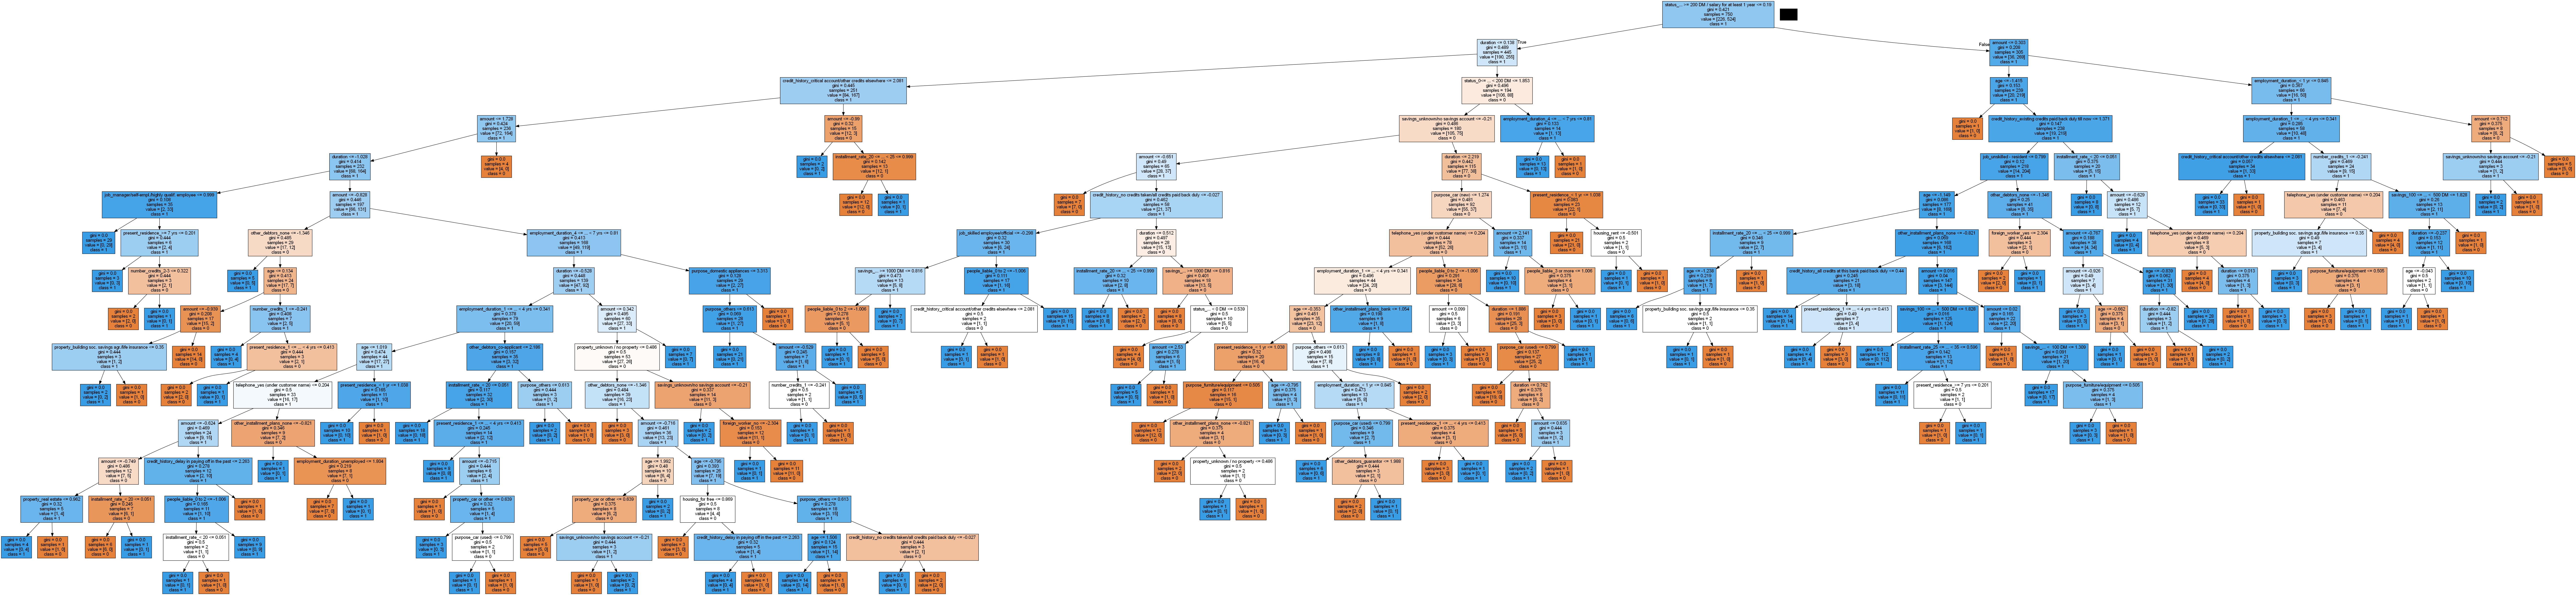

In [14]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [15]:
# Saving the tree as PDF
file_path = ("../Resources/credit_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("../Resources/credit_tree.png")
graph.write_png(file_path)



(process:39336): GLib-GIO-WARNING **: 16:27:26.264: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:39336): GLib-GIO-WARNING **: 16:27:26.417: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:39336): GLib-GIO-WARNING **: 16:27:26.442: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.63.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs



True